### Study session 10 - more bioinformatics
#### Use data and control structures, pandas, dataframes and explaore new libraries
#### Explore object  attributes and methods
#### BIOINF 575 - Fall 2021

#### SOLUTION

In [119]:
import numpy as np
import pandas as pd
import bamnostic as bs
import matplotlib.pyplot as plt
from collections import Counter

#### To install the bamnostic package open a terminal and run:
```bash
pip install bamnostic
```
##### It is one of the install options provided in the documentation

https://github.com/betteridiot/bamnostic

If it does not work try another option

There are 4 methods of installation available (choose one):

Option 1: Through the conda package manager (Anaconda Cloud)

```bash
# first, add the conda-forge channel to your conda build
conda config --add channels conda-forge

# now bamnostic is available for install
conda install bamnostic
```

## EXERCISES

____

#### Variant data exploration   
We have variant data for a sample in the file `variant_data_file.vcf`.   
The vcf data file contains information about differences found in the genome of a specific sample when compared to the reference.    
The file contains approximatelly 1000 differences found in the Y chromosome.





..................................................................................................

<b><font color = "red">Exercise</font> <br></b>

<b>See the difference in positions vaues between the different variant types (e.g. REF ALT: T C) using boxplots</b>   
<b>Plot the scatterplot of the positions for the TC variant</b>


In [3]:
# Write your solution here




In [28]:
# read the data from the vcf file  and add header (column labels)
# pd.read_csv function has a names argument that allows us to set the column labels

columns = ("CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO")
vcf_data = pd.read_csv("variant_data_file.vcf", comment = "#", sep = "\t", names = columns)
vcf_data

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO
0,Y,2728456,rs2058276,T,C,32,.,AC=2;AN=2;DB;DP=182;H2;NS=65
1,Y,2734240,.,G,A,31,.,AC=1;AN=2;DP=196;NS=63
2,Y,2743242,.,C,T,25,.,AC=1;AN=2;DP=275;NS=66
3,Y,2746727,.,A,G,34,.,AC=2;AN=2;DP=179;NS=64
4,Y,2777970,.,T,A,67,.,AC=1;AN=2;DP=225;NS=67
...,...,...,...,...,...,...,...,...
954,Y,27108406,rs2049642,G,A,30,.,AC=1;AN=2;DB;DP=163;NS=61
955,Y,27141305,rs9786602,C,A,29,.,AC=2;AN=2;DB;DP=163;NS=63
956,Y,27142489,rs1358368,G,C,37,.,AC=2;AN=2;DB;DP=195;H2;NS=61
957,Y,27182557,.,G,A,22,.,AC=1;AN=2;DP=168;NS=62


In [29]:
vcf_data.loc[:,("POS","REF","ALT")]

,POS,REF,ALT
0,2728456,T,C
1,2734240,G,A
2,2743242,C,T
3,2746727,A,G
4,2777970,T,A
...,...,...,...
954,27108406,G,A
955,27141305,C,A
956,27142489,G,C
957,27182557,G,A


In [30]:
# group the data by ref and alt to get the unique combinations for those columns
grouped_data = vcf_data.loc[:,("POS","REF","ALT")].groupby(["REF","ALT"])

# see what object we have and what it can do
# we see we can access the. grouped data column using the dot notation and the name
# .POS

print(type(grouped_data))

# see the 10 available elements from dir
dir(grouped_data)[:10]

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


['ALT',
 'POS',
 'REF',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__']

In [31]:
# see what object we have and what it can do
# we asee it can do apply

print(grouped_data.POS)

# get the first 10 non (d)under methods from dir using comprehensions
[elem for elem in dir(grouped_data.POS) if not elem.startswith("_")][:10]

['agg',
 'aggregate',
 'all',
 'any',
 'apply',
 'backfill',
 'bfill',
 'corr',
 'count',
 'cov']

In [32]:
series_pos_lst = grouped_data.POS.apply(list)
series_pos_lst

REF  ALT
A    C      [2947824, 3034782, 6741979, 8289995, 8476058, ...
     G      [2746727, 2782506, 2788927, 3751769, 4177733, ...
     T      [3134753, 7609445, 7772917, 8170520, 8528719, ...
C    A      [4426933, 4546612, 6941616, 7269744, 7346986, ...
     G      [3094725, 7630822, 8110994, 8442265, 8596868, ...
     T      [2743242, 2899051, 2962839, 2972385, 3168773, ...
G    A      [2734240, 2783755, 2900301, 2923665, 3144401, ...
     C      [3537173, 5257625, 5746218, 6991040, 7366539, ...
     T      [4706572, 6067257, 6972992, 7244644, 7702823, ...
T    A      [2777970, 2816471, 3781790, 6986038, 7741156, ...
     C      [2728456, 2815679, 2891375, 2944029, 4305332, ...
     G      [2813908, 2841844, 5788934, 6737619, 6810775, ...
Name: POS, dtype: object

In [33]:
# all in one
# select the data for the 3 columns of interest using .loc subsetting on the dataframe
# group by the 2 columns that identify a variant type
# select the grouped POS column
# make a list for each unique type of variant using apply list

series_pos_lst = vcf_data.loc[:,("POS","REF","ALT")].groupby(["REF","ALT"])["POS"].apply(list)

In [34]:
# the rownames/ index does not look ok, it is not a single label
series_pos_lst

REF  ALT
A    C      [2947824, 3034782, 6741979, 8289995, 8476058, ...
     G      [2746727, 2782506, 2788927, 3751769, 4177733, ...
     T      [3134753, 7609445, 7772917, 8170520, 8528719, ...
C    A      [4426933, 4546612, 6941616, 7269744, 7346986, ...
     G      [3094725, 7630822, 8110994, 8442265, 8596868, ...
     T      [2743242, 2899051, 2962839, 2972385, 3168773, ...
G    A      [2734240, 2783755, 2900301, 2923665, 3144401, ...
     C      [3537173, 5257625, 5746218, 6991040, 7366539, ...
     T      [4706572, 6067257, 6972992, 7244644, 7702823, ...
T    A      [2777970, 2816471, 3781790, 6986038, 7741156, ...
     C      [2728456, 2815679, 2891375, 2944029, 4305332, ...
     G      [2813908, 2841844, 5788934, 6737619, 6810775, ...
Name: POS, dtype: object

In [35]:
# it is list of tuples
series_pos_lst.index

MultiIndex([('A', 'C'),
            ('A', 'G'),
            ('A', 'T'),
            ('C', 'A'),
            ('C', 'G'),
            ('C', 'T'),
            ('G', 'A'),
            ('G', 'C'),
            ('G', 'T'),
            ('T', 'A'),
            ('T', 'C'),
            ('T', 'G')],
           names=['REF', 'ALT'])

In [36]:
# we can make a string outof a tuple of strings using str.join

"".join(('A', 'C'))


'AC'

In [37]:
# we make a make a string outof a tuple of strings using str.join
# use use a lambda function to do that
# we use map to apply it to each element
# because the index is an iterable and it does not have an apply method

series_pos_lst.index  = map(lambda x: "".join(x), series_pos_lst.index)
series_pos_lst


AC    [2947824, 3034782, 6741979, 8289995, 8476058, ...
AG    [2746727, 2782506, 2788927, 3751769, 4177733, ...
AT    [3134753, 7609445, 7772917, 8170520, 8528719, ...
CA    [4426933, 4546612, 6941616, 7269744, 7346986, ...
CG    [3094725, 7630822, 8110994, 8442265, 8596868, ...
CT    [2743242, 2899051, 2962839, 2972385, 3168773, ...
GA    [2734240, 2783755, 2900301, 2923665, 3144401, ...
GC    [3537173, 5257625, 5746218, 6991040, 7366539, ...
GT    [4706572, 6067257, 6972992, 7244644, 7702823, ...
TA    [2777970, 2816471, 3781790, 6986038, 7741156, ...
TC    [2728456, 2815679, 2891375, 2944029, 4305332, ...
TG    [2813908, 2841844, 5788934, 6737619, 6810775, ...
Name: POS, dtype: object

In [42]:
# the lists have different lengths

series_pos_lst.apply(len)

AC     34
AG    155
AT     26
CA     56
CG     49
CT    175
GA    163
GC     46
GT     53
TA     35
TC    124
TG     43
Name: POS, dtype: int64

In [44]:
# make a dataframe from the lists 
# there will be missing values added (NaNs) 
# to make the lists have the same length because we need a matrix

df_pos = series_pos_lst.apply(lambda x: pd.Series(x))
df_pos

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
AC,2947824.0,3034782.0,6741979.0,8289995.0,8476058.0,8538528.0,12702608.0,13007215.0,13972076.0,14009504.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AG,2746727.0,2782506.0,2788927.0,3751769.0,4177733.0,5277196.0,6520348.0,6886543.0,6893285.0,6907416.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT,3134753.0,7609445.0,7772917.0,8170520.0,8528719.0,8618969.0,9231956.0,10004763.0,12589811.0,12660466.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CA,4426933.0,4546612.0,6941616.0,7269744.0,7346986.0,7437905.0,7709447.0,7797070.0,8253988.0,8545542.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CG,3094725.0,7630822.0,8110994.0,8442265.0,8596868.0,8704218.0,10451700.0,10460172.0,10645664.0,12526525.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CT,2743242.0,2899051.0,2962839.0,2972385.0,3168773.0,4934629.0,5121270.0,6722712.0,6983525.0,7003522.0,...,21957669.0,22366760.0,22368210.0,22765516.0,22808980.0,22825891.0,22835395.0,22847367.0,26925716.0,27015657.0
GA,2734240.0,2783755.0,2900301.0,2923665.0,3144401.0,4176203.0,4346875.0,5189448.0,5878860.0,6690931.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,3537173.0,5257625.0,5746218.0,6991040.0,7366539.0,7455806.0,7749389.0,7908043.0,8325507.0,8527563.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GT,4706572.0,6067257.0,6972992.0,7244644.0,7702823.0,7742272.0,7774986.0,8610003.0,8933160.0,10008607.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TA,2777970.0,2816471.0,3781790.0,6986038.0,7741156.0,7802116.0,8350951.0,11681806.0,11967103.0,12541334.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# transpose to make the variant types the columns

df_pos.T

,AC,AG,AT,CA,CG,CT,GA,GC,GT,TA,TC,TG
0,2947824.0,2746727.0,3134753.0,4426933.0,3094725.0,2743242.0,2734240.0,3537173.0,4706572.0,2777970.0,2728456.0,2813908.0
1,3034782.0,2782506.0,7609445.0,4546612.0,7630822.0,2899051.0,2783755.0,5257625.0,6067257.0,2816471.0,2815679.0,2841844.0
2,6741979.0,2788927.0,7772917.0,6941616.0,8110994.0,2962839.0,2900301.0,5746218.0,6972992.0,3781790.0,2891375.0,5788934.0
3,8289995.0,3751769.0,8170520.0,7269744.0,8442265.0,2972385.0,2923665.0,6991040.0,7244644.0,6986038.0,2944029.0,6737619.0
4,8476058.0,4177733.0,8528719.0,7346986.0,8596868.0,3168773.0,3144401.0,7366539.0,7702823.0,7741156.0,4305332.0,6810775.0
...,...,...,...,...,...,...,...,...,...,...,...,...
170,NaN,NaN,NaN,NaN,NaN,22825891.0,NaN,NaN,NaN,NaN,NaN,NaN
171,NaN,NaN,NaN,NaN,NaN,22835395.0,NaN,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN,NaN,22847367.0,NaN,NaN,NaN,NaN,NaN,NaN
173,NaN,NaN,NaN,NaN,NaN,26925716.0,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

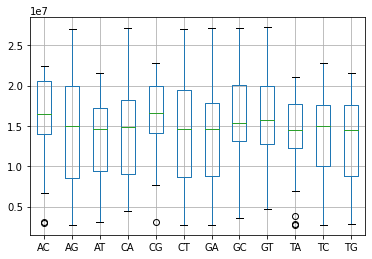

In [46]:
# plot the column, each column will be plotted separatelly 
# (different line in the plot or different bar or different box)

# note the. sclae of the yaxes shows 1e7 on the top left
# that means the scale must be multiplied by 10 to the power 7 (1e7 scientific notation)
# the genome positions span a long range

# the variant type seem to randomly distributed and no type is 
# more prevalent towards the beginning or eand of the genomic position

df_pos.T.boxplot()


<AxesSubplot:>

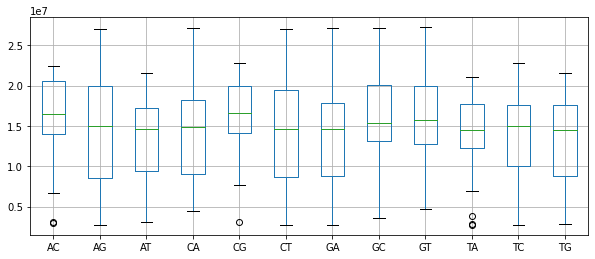

In [50]:
# make the figure larger by setting the length and width of the figure

df_pos.T.boxplot(figsize = (10,4))

In [52]:
# get the positions for the TC variants
# select the given row from the dataframe

df_pos.loc["TC",]

0      2728456.0
1      2815679.0
2      2891375.0
3      2944029.0
4      4305332.0
         ...    
170          NaN
171          NaN
172          NaN
173          NaN
174          NaN
Name: TC, Length: 175, dtype: float64

<AxesSubplot:>

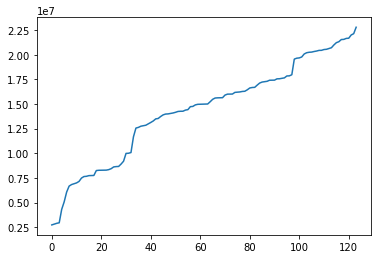

In [53]:
# plot the data

df_pos.loc["TC",].plot()

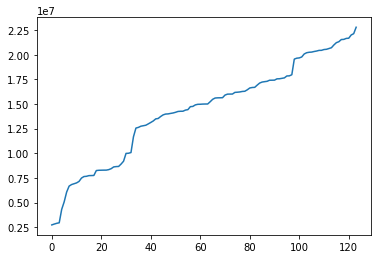

In [55]:
# select the respective element from the series, and plot the list
plt.plot(series_pos_lst["TC"])

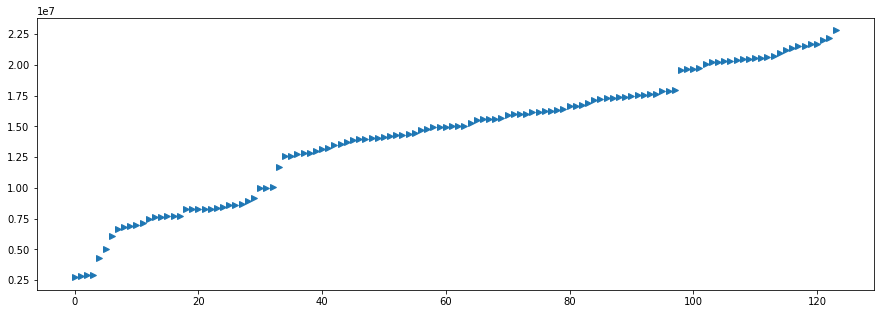

In [68]:
# make a scatter plot by setting the point marker to triangle and 
# the line width to 0 to remove the line
# if you want to chage the figure size you need to do that before plotting

plt.figure(figsize = (15,5))
plt.plot(series_pos_lst["TC"], marker = ">", linewidth = "0")

In [69]:
# scatter is not available for series, just data frames

# df_pos.loc["TC"].plot(kind = "scatter")

# ValueError: plot kind scatter can only be used for data frames

<AxesSubplot:>

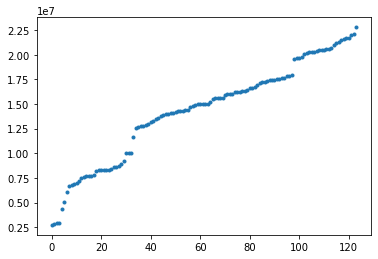

In [70]:
# using the series plot
# make a scatter plot by setting the point marker to dot and 
# the line width to 0 to remove the line

df_pos.loc["TC"].plot(linewidth = 0, marker = ".")

<AxesSubplot:>

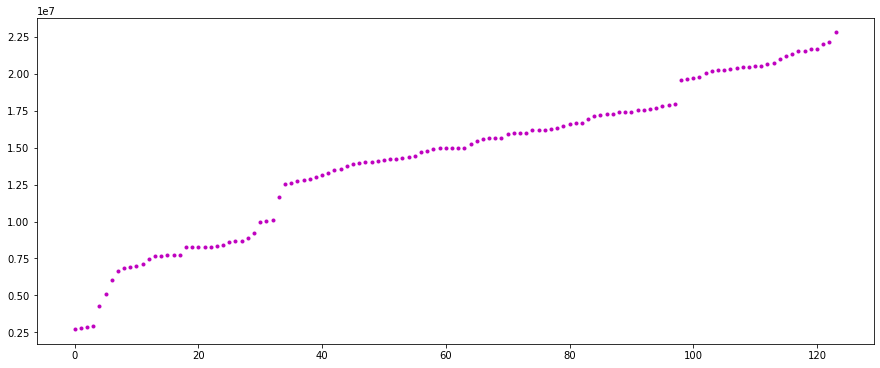

In [77]:
df_pos.loc["TC"].plot(style = "m.", figsize = (15,6))

In [102]:
# using the dataframe plot
# when you index a dataframe you get a series, when you subset a dataframe you get a dataframe

df_TC = df_pos.loc["TC":"TC"]
print(df_TC)
type(df_TC)

          0          1          2          3          4          5    \
TC  2728456.0  2815679.0  2891375.0  2944029.0  4305332.0  5066360.0   

          6          7          8          9    ...  165  166  167  168  169  \
TC  6060464.0  6667318.0  6826034.0  6908560.0  ...  NaN  NaN  NaN  NaN  NaN   

    170  171  172  173  174  
TC  NaN  NaN  NaN  NaN  NaN  

[1 rows x 175 columns]


pandas.core.frame.DataFrame

In [88]:
type(df_TC)

pandas.core.frame.DataFrame

In [89]:
df_TC.shape

(1, 175)

<AxesSubplot:xlabel='TC', ylabel='TC'>

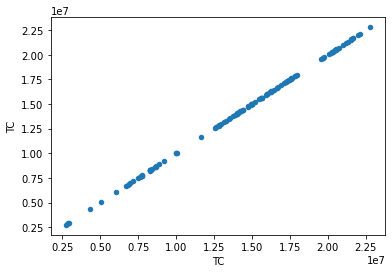

In [103]:
# for the scatter plot 
# we need to have two columns in the dataframe to set x and y

df_TC.T.plot(x = "TC", y = "TC", kind = "scatter")

In [96]:
# our x should be the column labels of the non transposed df
df_TC.columns

RangeIndex(start=0, stop=175, step=1)

In [105]:
# we make it a series and we add a name to it
col_x = pd.Series(df_TC.columns, name = "column_x")
col_x

0        0
1        1
2        2
3        3
4        4
      ... 
170    170
171    171
172    172
173    173
174    174
Name: column_x, Length: 175, dtype: int64

In [106]:
# then we add the Series as a column to the dataframe using join
df_TC.T.join(col_x)

,TC,column_x
0,2728456.0,0
1,2815679.0,1
2,2891375.0,2
3,2944029.0,3
4,4305332.0,4
...,...,...
170,NaN,170
171,NaN,171
172,NaN,172
173,NaN,173


<AxesSubplot:xlabel='column_x', ylabel='TC'>

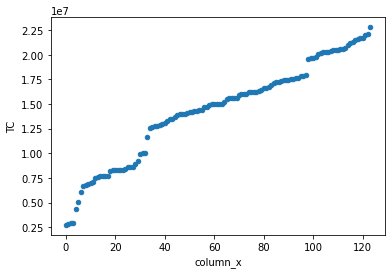

In [107]:
# the resulting df has two columns so we do a scatterplot

df_TC.T.join(col_x).plot(x = "column_x", y = "TC", kind = "scatter")

____
____


#### Read alignment analysis   
We have the sequence alingnment data for a (biological) sample.   





___

<b> <font color = "red">Exercise</font></b>

<b>From the bam file mt.bam, select the reads that align at positions FROM 5500 TO 5550. </b>
(updated requirements to make the list of positions shorter and the reads list more mangeable)     
<b>Create a Counter (from collections import Counter) list and keep track of each base that aligns at a certain position from 5500 to 5650, the list has 151 elements indices 0-150, index 0 corresponds to position 5500 in the genome </b>    
We go beyond the 5550 position because if the read aligns at position 5550 the first nucleotide in the read aligns there and subsequent nucleotides in the read align at subsequent positions and the read might have 100 nucleotides.

In [111]:
# Write your solution here




`mt.bam` is from  https://github.com/brainstorm/tiny-test-data/tree/master/wgs


In [ ]:
next(bam)

TypeError: object of type 'NoneType' has no len()

In [113]:
# Open the bam file and go through the reads one at a time
# we use the with control structure to open the file 
# so we don't have to explicitly close the file

# the warning appears ony the first timewe run the code
# the warning tells us we do not have an index file (.bai) for the bam file
# typically bam files are large so we need an index to quickly access the data
# without the index file it is slower, but there is no other issue with data acess

with bs.AlignmentFile("mt.bam", 'rb') as bam:
    no_reads = 0
    for read in bam:
        no_reads += 1 # printing another read so increase the number
        print(read.seq, read.pos)
        if no_reads >= 10: # when you reached 10 reads
            break # exit the loop

GAACCCTAACACCAGCCTAACCAGATTTCAAATTTTATCTTTTGGCGGTATGCACTTTTAACTCTTGCACCCACCTCGGGAGGAGGGAGGGGGTAGGAGAG 365
CTCTCCTACCCCCTCCCTCCTCCCGAGGTGGGTGCAAG 144442892
TCTTTGATTCCTGCCTCATCCTATTATTTATCGCACCTACGTTCAATATTACAGGCGAACATACTTACTAAAGTGTGTTAATTAATTAATGCTTGTAGGAC 130
TCATCAGGGGAAATTTCCCCCACACCAGGAGCTAACCAGATTTCAAATTTTATCTTTTGGCGGTATGCACTTTTAACAGTCACCCCCCAACTAACACATTA 381
TCATCAGGGGAAATTTCCCCCACACCAGGAGCT 137917
GTTTAGACGGGCTCACATCACCCCATAAACAAATAGGTTTGGTCCTAGCCTTTCTATTAGCTCTTAGTAAGATTACACATGCAAGCATCCCCGTTCCAGTG 616
GAGATGATACCTTGAAAGGAACTGCACACCTAGTGAATTATAAGCCACTCCCATACTACTAATCTCATCAACACAACCCCCGCCCATCCTACCCAGCACAC 461
GAGATGATACCTTGAAAGGAACTGCACACCTAGTGAATTATAAGCCACT 33636158
CCTAGCCTTTCTATTAGCTCTTAGTAAGATTACACATGCAAGCATCCCCGTTCCAGTGAGTTCACCCTCTAAATCCCCACGATCAAAAGGGACAAGCATCA 659
TGTTCTGTAATCGATAAACCCCGATCAACCTCACCACCTCTTGCTCAGCCTATATACCGCCATCTTCAGCAAACCCTGATGAAGGCTACAAAGTAAGCGCA 1204


In [114]:
# now let's put a condition and get only the reads with a position between 5500 and 5550
# the result will be a list of reads

reads_lst = []

with bs.AlignmentFile("mt.bam", 'rb') as bam_file:
    for read in bam_file:
        if (read.pos >= 5500 and read.pos <= 5550): # when we find a read that matches the position
            reads_lst.append(read) # add it to the list

# check how many reads we have in the list           
len(reads_lst)

17

In [118]:
# let's look at the last read in the file
# at the end of the for loop the read variable will contain the last read
read.pos, read.seq

(75422376, 'CAAGGCAGGAGGTTTGCCAAACTGGAATATGGAGCCCATGGCCGGGG')

```
# lets align to a genome of. size 10 a read of 3 nucleotides starting at pos (0-based) 4:
read.seq ACT
read.pos 4

____
read      :         A C T
index     : 0 1 2 3 4 5 6 7 8 9 10
_____________

# lets align to a genome of size 10 another read of 3 nucleotides starting at pos (0-based) 5:
read.seq CAC
read.pos 5
____
read      :         A C T
read1     :           C A C
index     : 0 1 2 3 4 5 6 7 8 9 10
```

In [121]:
# a counter will keep track of the reads at each position
# we added in the import cell at the top of the notebook the import statement:
# from collections import Counter

# create an empty counter
c = Counter()

In [122]:
# add a nucleotide 
# look at index 6 in the above example 
# if we run the cell multiple times we will add multiple T nucleotides
# the value for T will increase by 1 with each run
# to reset run the above cell

c.update("T")

In [123]:
c

Counter({'T': 1})

In [124]:
# we add another nucleotide

c.update("A")

In [126]:
c

Counter({'T': 1, 'A': 1})

In [132]:
# let's create the genome positions list with counters for each position
# we use a comprehension to create a list of 151 empty counters

genome_pos = [Counter() for i in range(150)]
print(len(genome_pos))
genome_pos[:10]


150


[Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter()]

In [133]:
# now let's align the reads in the reads_lst as we did for TAC on the genome of size 10
# the problem is the we onlu have a fragment of the genome (151 positions)
# The positions are 5500 - 5650 (0-based) and are stored in the genome_pos list that indexed from 0 to 150
# therefore, there is a missmatch of 5500 between the indices in the genome and in the list
# this is not the case for the homework though

# let's align the first read
# if we align the same read again by running the cell twice and we want to start over
# we should reset the genome_pos list by running the above cell 

current_read = reads_lst[0]
print("read pos: ", current_read.pos)
print("read seq: ", current_read.seq)
# we should go though each nucleotide of the read sequence 
# keeping track of the nucleotide position in the read
# to do that we use enumerate
for i, nc in enumerate(current_read.seq):
    # we retrieve the counter from the genome_pos list
    # corresponding to the position in the genome we want to update
    # that is the position where the read aligned + the position of the nucleotide on the read
    # in this example we also need to adjust for the 5500 difference
    c = genome_pos[current_read.pos + i - 5500]
    c.update(nc)
    
# the first read was aligned and 
# all the nucleotides were added to the respective counters 
# starting with the counter at  current_read.pos - 5500  
genome_pos 

read pos:  5500
read seq:  ACCCCTACCTACCCACCCTATTATCCAAATAATCTTATAGAAATGTAGGTTAAATACAGGCCAGGCGCCTTCAAAGCCCCCAGTGAGTTGCAATACAAAAC


[Counter({'A': 1}),
 Counter({'C': 1}),
 Counter({'C': 1}),
 Counter({'C': 1}),
 Counter({'C': 1}),
 Counter({'T': 1}),
 Counter({'A': 1}),
 Counter({'C': 1}),
 Counter({'C': 1}),
 Counter({'T': 1}),
 Counter({'A': 1}),
 Counter({'C': 1}),
 Counter({'C': 1}),
 Counter({'C': 1}),
 Counter({'A': 1}),
 Counter({'C': 1}),
 Counter({'C': 1}),
 Counter({'C': 1}),
 Counter({'T': 1}),
 Counter({'A': 1}),
 Counter({'T': 1}),
 Counter({'T': 1}),
 Counter({'A': 1}),
 Counter({'T': 1}),
 Counter({'C': 1}),
 Counter({'C': 1}),
 Counter({'A': 1}),
 Counter({'A': 1}),
 Counter({'A': 1}),
 Counter({'T': 1}),
 Counter({'A': 1}),
 Counter({'A': 1}),
 Counter({'T': 1}),
 Counter({'C': 1}),
 Counter({'T': 1}),
 Counter({'T': 1}),
 Counter({'A': 1}),
 Counter({'T': 1}),
 Counter({'A': 1}),
 Counter({'G': 1}),
 Counter({'A': 1}),
 Counter({'A': 1}),
 Counter({'A': 1}),
 Counter({'T': 1}),
 Counter({'G': 1}),
 Counter({'T': 1}),
 Counter({'A': 1}),
 Counter({'G': 1}),
 Counter({'G': 1}),
 Counter({'T': 1}),


In [135]:
# reset the genome_positions to start over
genome_pos = [Counter() for i in range(150)]

# align all reads in reads_lst
for current_read in reads_lst:
    for i, nc in enumerate(current_read.seq):
        c = genome_pos[current_read.pos + i - 5500]
        c.update(nc)
    
# The counter tallied the nucleotides aligned at each position
# ALL DONE
genome_pos



[Counter({'A': 1}),
 Counter({'C': 1, 'A': 1}),
 Counter({'C': 1, 'A': 1}),
 Counter({'C': 2}),
 Counter({'C': 1, 'T': 1}),
 Counter({'T': 1, 'C': 1}),
 Counter({'A': 1, 'C': 1}),
 Counter({'C': 1, 'A': 1, 'T': 2}),
 Counter({'C': 1, 'T': 4, 'A': 1}),
 Counter({'T': 1, 'A': 4, 'G': 1}),
 Counter({'A': 2, 'T': 4, 'G': 1}),
 Counter({'C': 3, 'A': 4}),
 Counter({'C': 3, 'G': 4}),
 Counter({'C': 1, 'A': 5, 'T': 1}),
 Counter({'A': 5, 'C': 2}),
 Counter({'C': 2, 'G': 1, 'A': 3, 'T': 1}),
 Counter({'C': 2, 'T': 5}),
 Counter({'C': 1, 'A': 1, 'T': 5}),
 Counter({'T': 6, 'A': 1}),
 Counter({'A': 5, 'C': 1, 'T': 1}),
 Counter({'T': 2, 'G': 4, 'A': 1}),
 Counter({'T': 1, 'C': 2, 'G': 4}),
 Counter({'A': 2, 'T': 4, 'C': 1, 'G': 1}),
 Counter({'T': 7, 'A': 1}),
 Counter({'C': 1, 'A': 7, 'G': 1}),
 Counter({'C': 2, 'T': 2, 'A': 6}),
 Counter({'A': 7, 'G': 2, 'T': 1}),
 Counter({'A': 1, 'T': 7, 'C': 1, 'G': 1}),
 Counter({'A': 11, 'C': 1}),
 Counter({'T': 2, 'C': 8, 'G': 1, 'A': 1}),
 Counter({'A': 

In [143]:
# when you create a Counter object it will keep a reference 
# to the location in memory where the data is (similar to a list)
# so if I add the same Counter to two lists and change it, it will change in both lists

c = Counter()
l1 = [c]
l2 = [c]

In [144]:
l1

[Counter()]

In [145]:
l2

[Counter()]

In [146]:
c.update("AACGT")
c

Counter({'A': 2, 'C': 1, 'G': 1, 'T': 1})

In [147]:
l1

[Counter({'A': 2, 'C': 1, 'G': 1, 'T': 1})]

In [148]:
l2

[Counter({'A': 2, 'C': 1, 'G': 1, 'T': 1})]

In [168]:
# however if I create different counters ... 
# they will will each refer to their own data not to the same data

l1 = []
l2 = []
l1.append(Counter())
l2.append(Counter())

In [169]:
l1

[Counter()]

In [170]:
l2

[Counter()]

In [171]:
# Access counter in l1

c = l1[0]
c

Counter()

In [172]:
# change counter 
c.update("ACCG")
c

Counter({'A': 1, 'C': 2, 'G': 1})

In [173]:
l1

[Counter({'A': 1, 'C': 2, 'G': 1})]

In [174]:
l2

[Counter()]

In [175]:
# how do we get the most common element?
# dir(Counter) will tell us what a counter can do
# all that a dictionary can and ... most_common

# orders the items in the dictionary desc based on the value and 
# retrieces the result as a list of tuples
c.most_common()

[('C', 2), ('A', 1), ('G', 1)]

In [176]:
# we can say how may elements from the sorted list we want to retrieve
# parameter givent o most_common

c.most_common(2)

[('C', 2), ('A', 1)]

In [177]:
# to get the nucleotide we index to get the first tuple and 
# then the first element of the tuple

c.most_common()[0][0]

'C'

In [178]:
c.most_common(1)[0][0]

'C'

In [179]:
# if the frquencies are the same 
# the most common retrieves the items in the order they were added

c = Counter("ACT")
c

Counter({'A': 1, 'C': 1, 'T': 1})

In [180]:
c.most_common(1)[0][0]

'A'

In [181]:
c = Counter("GACT")
c

Counter({'G': 1, 'A': 1, 'C': 1, 'T': 1})

In [182]:
c.most_common(1)[0][0]

'G'